## 属性

### 实例属性
- 从属于实例对象的属性，也称“实例变量”
- 要点：
    - 实例属性一般在'\_\_init\_\_'()方法中定义：self.实例属性名 = 初始值
    - 在本类中的其他实例方法中，也是通过self进行访问：self.实例属性名
    - 创建实例对象后，通过实例对象来访问：
        - 创建对象 s = 类名()
        - 可以给已有属性赋值，也可以添加新的属性：s.实例属性名 = 值

In [20]:
"""
定义实例属性
"""
class Person(object):
    
    def __init__(self, name, score):#实例属性
        self.name = name
        self.score = score
        
    def get_name(self):
        return self.name          #本类中的其他实例方法中，也是通过self进行访问

p1 = Person('Bob', 90)
print (p1.get_name)
print (p1.get_name())
del p1

"""
修改实例属性
"""
#由于Python是动态语言，对每一个实例，都可以直接给他们的属性赋值或者添加属性
xiaoming = Person("ll",22)
print(xiaoming.name)
xiaoming.name = 'Xiao Ming'# 重新赋值
print(xiaoming.name)
xiaoming.gender = 'Male'# 添加属性
print(xiaoming.gender)
# 删除对象后，属性消失
del xiaoming
print(xiaoming.gender)

<bound method Person.get_name of <__main__.Person object at 0x000001E6BE504978>>
Bob
ll
Xiao Ming
Male


NameError: name 'xiaoming' is not defined

In [5]:
class Person(object):
    def __init__(self,name,gender,birth,**kw):
        self.name = name
        self.gender = gender
        self.birth = birth
        for k, v in kw.items():
            setattr(self, k, v)
#除了可以直接使用self.name = 'xxx'设置一个属性外，还可以通过 setattr(self, 'name', 'xxx') 设置属性。
xiaoming = Person('Xiao Ming', 'Male', '1990-1-1', job='Student')

print (xiaoming.name)
print (xiaoming.job)

Xiao Ming
Student


In [3]:
"""
初始化实例属性
"""
# 在定义 Person 类时，可以为Person类添加一个特殊的__init__()方法，创建实例时，__init__()方法被自动调用。
# 有了__init__()方法，每个Person实例在创建时，都会有特定的属性，并且，被赋予不同的属性值，访问属性使用"."操作符
# 要特别注意的是，初学者定义__init__()方法常常忘记了第一个参数必须是 self 

class Person(object):
    def __init__(self, name, gender, birth):
        #################################################################################################################################
        # __init__() 方法的第一个参数必须是 self（也可以用别的名字，但建议使用习惯用法），后续参数则可以自由指定，和定义函数没有任何区别。
        #################################################################################################################################
        self.name = name
        self.gender = gender
        self.birth = birth
        ####################################################
        #相应地，创建实例时，就必须要提供除 self 以外的参数：
        ####################################################
xiaoming = Person('Xiao Ming', 'Male', '1991-1-1')
xiaohong = Person('Xiao Hong', 'Female', '1992-2-2')

print (xiaoming.name)
print (xiaohong.birth)
        

Xiao Ming
1992-2-2


In [2]:
class Person(object):
    pass
p1 = Person()
p1.name = 'Bart'
p2 = Person()
p2.name = 'Adam'
p3 = Person()
p3.name = 'Lisa'
L1 = [p1, p2, p3]
L2 = sorted(L1,key=lambda x:x.name)#按照 name 进行排序。

print (L2[0].name)
print (L2[1].name)
print (L2[2].name)

Adam
Bart
Lisa


### 类属性
- 类是模板，而实例则是根据类创建的对象。
- 实例属性每个实例各自拥有，互相独立，而类属性有且只有一份
    - 绑定在实例上的属性不会影响其他实例，但类本身也是对象，如果在类上绑定属性，则所有实例都可以访问类的属性，且所有实例访问的类属性都是相同

In [15]:
"""
定义类属性：
"""
#可以直接在 class 中定义
class Person(object):
    address = 'Earth'
    def __init__(self, name):
        self.name = name
"""
访问类属性：
"""
#类属性直接绑定在类上，访问类属性不需要创建实例，可以直接访问：
print (Person.address)
#对一个实例调用类的属性也是可以访问的，所有实例都可以访问到它所属的类的属性：
p1 = Person('Bob')
p2 = Person('Alice')
print (p1.address)
print (p2.address)
"""
修改类属性：
"""
#由于Python是动态语言，类属性也是可以动态添加和修改的,但要注意类属性和实例属性是否重名

Person.address = 'China'
#因为类属性只有一份，所以，当Person类的address改变时，所有实例访问到的类属性都改变了。
print (p1.address)
print (p2.address)

print("***************")
"""
类与实例属性重名时
"""
class Person(object):
    address = 'Earth'
    def __init__(self, name):
        self.name = name

p1 = Person('Bob')
p2 = Person('Alice')

print ('Person.address = ' + Person.address)

p1.address = 'China'
#我们发现，在设置了 p1.address = 'China' 后，p1访问 address 确实变成了 'China'，但是，Person.address和p2.address仍然是'Earch'
print ('p1.address = ' + p1.address)
print ('Person.address = ' + Person.address)
print ('p2.address = ' + p2.address)
##############################################################################################################################################
#原因是 p1.address = 'China'并没有改变 Person 的 address，而是给 p1这个实例绑定了实例属性address ，
#对p1来说，它有一个实例属性address（值是'China'），而它所属的类Person也有一个类属性address
#所以访问 p1.address 时，优先查找实例属性，返回'China'。访问 p2.address 时，p2没有实例属性address，但是有类属性address，因此返回'Earth'。
#可见，当实例属性和类属性重名时，实例属性优先级高，它将屏蔽掉对类属性的访问。
##############################################################################################################################################
del p1.address
#当我们把 p1 的 address 实例属性删除后，访问 p1.address 就又返回类属性的值 'China'了：
print (p1.address)
print (p2.address)

Earth
Earth
Earth
China
China
***************
Person.address = Earth
p1.address = China
Person.address = Earth
p2.address = Earth
Earth
Earth


## 私有属性/方法
- Python对属性或方法的权限的控制是通过名称来实现的，如果一个属性/方法由双下划线开头(__)，该属性就无法被外部直接访问（但内部任然可以访问）。
- 外部可以间接访问 ："\_类名\_\_私有属性/方法名"
- 但是，如果一个属性/方法以"\_\_xxx\_\_"的形式定义，那它又可以被外部访问了，以"\_\_xxx\_\_"定义的属性在Python的类中被称为特殊属性，有很多预定义的特殊属性可以使用，通常我们不要把普通属性用"\_\_xxx\_\_"定义。

In [21]:
class Person(object):
    
    __age = 18               #私有类属性
    
    def __init__(self, name):#私有实例属性
        self.name = name
        self._title = 'Mr'
        self.__job = 'Student'
        
    def __work(self):       # 私有实例方法
        print("lll")
        print("{0}".format(self.__job))# 内部是可以调用私有实例属性的
        print("{0}".format(Person.__age))
        return "结束"
        
        
# 调用   
p = Person('Bob')
print (p.name)
print(p._title)
print(dir(p))
print(p._Person__job)          #间接访问
print(p._Person__work())       #间接访问
print (p.job or p.__job)       #直接访问  失败
print (p.work() or p.__work()) #直接访问  失败

Bob
Mr
['_Person__age', '_Person__job', '_Person__work', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_title', 'name']
Student
lll
Student
18
结束


AttributeError: 'Person' object has no attribute 'job'

# 类与实例解析

In [32]:
# 定义类：
class Person(object):# object是父类，可以没有
    
    dress = "green"                 # 类属性
    age = 18
    count = 0

    @classmethod                    # 类方法 
    def how_many(cls):
        return cls.count    
    
    def __init__(self,name,score):# 实例属性
                                  # 创建对象时，我们需要构造函数__init__()方法，用于创建对象时，初始化对象属性，第一个参数必须是是self。    
        self.name = name
        self.score= score
        Person.count += 1
        
        
    def say_score(self):          # 实例方法
        print("{0}的分数是:{1}".format(self.name,self.score))
        
# 创建对象        
s = Person("小米",18)        
# 通过类名调用构造函数
#这个程序分为两步：首先__new__()方法创建一个对象，然后__init__()方法初始化建好的对象，给实例属性赋值


print(type(Person))# 类也是对象
print (s)
s.say_score()

print (Person.how_many(),Person.count)

<class 'type'>
小米的分数是:18
1 1


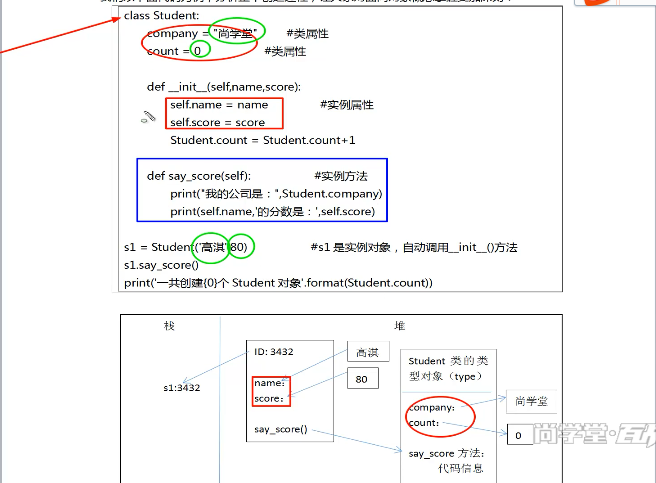

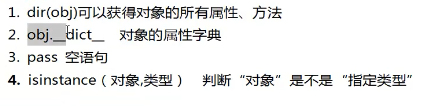